In [1]:
import pandas as pd
from seeq import spy

# Set the compatibility option so that you maximize the chance that SPy will remain compatible with your notebook/script
spy.options.compatibility = 193

In [2]:
# Log into Seeq Server if you're not using Seeq Data Lab:
spy.login(url='http://localhost:34216', credentials_file='../credentials.key', force=False)

# Data Lab Visualizations

Seeq Workbench provides many visualizations out-of-the-box, including the Trend view and XY Plot. You may find that a very specific type of visualization is helpful for a particular use case, and that you can produce this visualization using Python and one of the many open-source libraries at your disposal like [Matplotlib](https://matplotlib.org/), [Plotly](plotly.com), and [Seaborn](https://seaborn.pydata.org/).

Wouldn't it be nice to push such visualizations into an Organizer Topic so that you can share them with colleagues, and potentially mix them in with Seeq trends, XY plots, or treemaps? You can do it easily using [Workbook Templates](Workbook%20Templates.ipynb) and this article walks you through it. (You may want to read about Workbook Templates first, but it's not strictly necessary.)

## Creating a Template

First you must create an Organizer Topic template that will describe the form of the destination for the visualization.

For the purposes of illustration, we will first push an Organizer Topic to Seeq so that you can see what the template looks like. Then we'll use it to push a visualization.

In [3]:
# Load the workbook templates from the documentation's Support folder
workbooks = spy.workbooks.load('./Support Files/Workbook Templates.zip')

# Grab just the Data Lab Visualization example
data_lab_visualization_workbook = workbooks['Data Lab Visualization Example']

# Push it to Seeq
spy.workbooks.push(data_lab_visualization_workbook)

,ID,Name,Type,Workbook Type,Count,Time,Errors,Result,Pushed Workbook ID,URL
0,0EF82BC4-506F-60C0-8D5A-8C639185D3EF,Data Lab Visualization Example,Workbook,Topic,2,00:00:00.19,0,Success,0EF82BC4-506F-60C0-8D5A-8C639185D3EF,link


,ID,Name,Type,Workbook Type,Count,Time,Errors,Result,Pushed Workbook ID,URL
0,0EF82BC4-506F-60C0-8D5A-8C639185D3EF,Data Lab Visualization Example,Workbook,Topic,2,0:00:00.190636,0,Success,0EF82BC4-506F-60C0-8D5A-8C639185D3EF,http://localhost:34216/workbook/0EF82BC4-506F-...


If you click on the _link_ under the URL header of the green box above, you'll see an Organizer Topic with a picture of a grumpy cat.

Click on the grumpy cat image, and then select the **Change image text alternative** button:
 
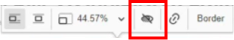

When you do, you'll see that the "text alternative" for the image is `{{My Visualization 1}}`:

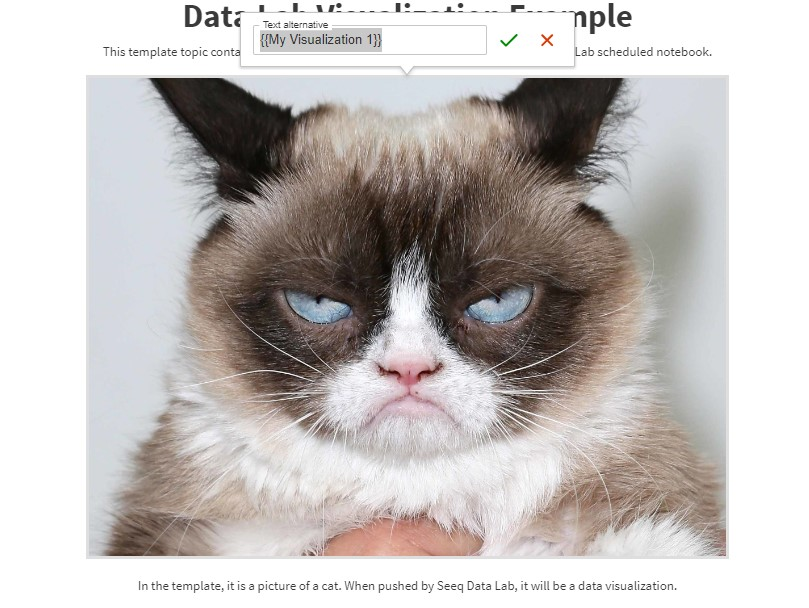

This "double curly-brace" syntax designates this image as a _mustache variable_. It will appear in the template parameters when you load this Topic as a template, as you will see below.

This approach allows you to put any number of placeholder images in your Topic and give them each a different mustache variable name. For example, you may wish to create a table and put several placeholder images in various rows of the table, and you can size them and position them within their cell.

You will also see `{{{My Table 1}}}` below the placeholder image. This is another mustache variable where we will illustrate how to insert HTML.

## Use the Template

Now that we've seen what the Topic looks like, let's load it as a template and look at the code for the parameters:

In [4]:
workbooks = spy.workbooks.load('./Support Files/Workbook Templates.zip',
                               as_template_with_label=f'{spy.user.username} Data Lab Visualization')

In [5]:
data_lab_visualization_template = workbooks['Data Lab Visualization Example']

print(data_lab_visualization_template.code)

topic.parameters = {
    "[Image] My Visualization 1": None,
    "[AltText] My Visualization 1": None,
    "My Table 1": None
}


As you can see, SPy has found the `My Visualization 1` mustache variable, and it has added three parameters to the template as follows:

- `"[Image] My Visualization 1"` is where you will specify the filename for the image. It can be any image type that is recognized by a browser. The most common are `.jpg` or `.png`.
- `"[AltText] My Visualization 1"` is where you can (optionally) define what the alternative text for the image will be.
- `"My Table 1"` is where we will insert an HTML table.

## Create an Image Visualization

Now let's pull some data and create a simple visualization using Matplotlib.

Matplotlib is not installed with core SPy. You may need to un-comment the cell below to install the 'templates' extras and use Matplotlib.

In [6]:
# pip install seeq-spy[templates]

In [7]:
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Pull 10 hours of data to populate a histogram
pull_df = spy.pull(spy.search({'Datasource Name': 'Example Data', 'Name': 'Area B_Relative Humidity'}),
                   start=datetime.now() - timedelta(hours=10))

area_b_rh = pull_df['Area B_Relative Humidity']

,ID,Type,Name,Time,Count,Pages,Data Processed,Result
0,0EF82BBC-5367-7370-8188-F85AA273EF87,StoredSignal,Area B_Relative Humidity,00:00:00.04,40,1,800 B,Success


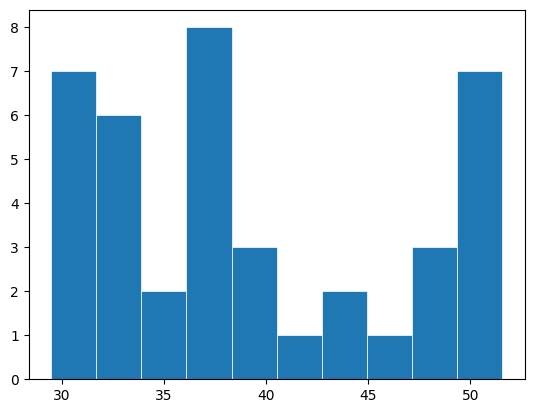

In [8]:
# Create a histogram plot
fig, ax = plt.subplots()
ax.hist(area_b_rh, linewidth=0.5, edgecolor="white")

# Save it to disk so we can use it in the template
filename = 'my_data_lab_histogram.png'
plt.savefig(filename)

This simple histogram is the visualization we'll push to the Topic via the template.

## Create an HTML Visualization

Your visualization may use HTML markup instead of taking the form of an image. For example, you may wish to insert a table, SVG markup, or any other type of HTML. In such a case, you must specify three braces in your template, as you'll see that we did with `{{{My Table 1}}}`.

In this example, we will create a DataFrame and then use the `.to_html()` function to convert it to table markup and specify it in the template parameters below.

In [9]:
my_table = pd.DataFrame([{
    'City': 'Paris',
    'Country': 'France'
}, {
    'City': 'London',
    'Country': 'United Kingdom'
}])

# Convert the DataFrame to HTML
my_table_html = my_table.to_html(index=False)

print(my_table_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>City</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Paris</td>
      <td>France</td>
    </tr>
    <tr>
      <td>London</td>
      <td>United Kingdom</td>
    </tr>
  </tbody>
</table>


As mentioned above, you can insert any type of HTML. Here are some tips:

- Keep your HTML markup as simple and straightforward as possible. This will keep it "understandable" to the HTML editor that's built into Seeq Organizer.
- Coloration and styling should be specified via `style` attributes. For example: `<table style="background-color:hsl( 0, 100%, 98% ); border:2px dotted hsl(30, 75%, 60%);">`
- Use HSL color specifications. (That's what the HTML editor uses.)
- Do not attempt to use Javascript in any fashion.

## Push to Organizer

Now we will specify the visualizations in the template parameters. For the image, we refer to the place we saved it when filling out the template parameters. For the HTML markup, we supply the string directly.

In [10]:
# Specify saved file as the parameter value. Note that you must supply a value for the [Image]
# placeholder, but the [AltText] is optional -- you can leave it as None and it will just be
# blank after pushing.
data_lab_visualization_template.parameters = {
    "[Image] My Visualization 1": filename,
    "[AltText] My Visualization 1": "A histogram of the last 10 hours",
    "My Table 1": my_table_html
}

# Push it!
spy.workbooks.push(data_lab_visualization_template)

,ID,Name,Type,Workbook Type,Count,Time,Errors,Result,Pushed Workbook ID,URL
0,0EF82BC4-506F-60C0-8D5A-8C639185D3EF agent_api_key Data Lab Visualization,Data Lab Visualization Example,Workbook,Topic,2,00:00:00.10,0,Success,0EF83852-599F-7330-9B83-CC7BBA59E29B,link


,ID,Name,Type,Workbook Type,Count,Time,Errors,Result,Pushed Workbook ID,URL
0,0EF82BC4-506F-60C0-8D5A-8C639185D3EF agent_api...,Data Lab Visualization Example,Workbook,Topic,2,0:00:00.103740,0,Success,0EF83852-599F-7330-9B83-CC7BBA59E29B,http://localhost:34216/workbook/0EF83852-599F-...


Click on the _link_ underneath the URL header in the green box and you should see the histogram.

In [11]:
# Clean up the image file we created
os.remove(filename)

## Schedule it

Chances are you have created a visualization that you want to be updated periodically. If you're using Seeq Data Lab, that's easy, just schedule it:

In [12]:
# Uncomment the next line to run this notebook on a schedule
# spy.jobs.schedule('every 1 day')

In [13]:
# Uncomment the next line to cancel the schedule
# spy.jobs.unschedule()